# Web Searching Tools

In [1]:
import os
from dotenv import load_dotenv
load_dotenv(override=True)

True

In my case, I mostly work with langchain, so I will use the langchain library to load the data.

Also, output from langchain wrapper is typically clean and LLM-ready


## Firecrawl

You will need to get your own API key. See https://firecrawl.dev

In [2]:
from langchain_community.document_loaders.firecrawl import FireCrawlLoader

In [3]:
loader = FireCrawlLoader(url = "https://www.salesfactory.com/",
                         mode = "scrape")

### Mode


 - scrape: Scrape single url and return the markdown.
 - crawl: Crawl the url and all accessible sub pages and return the markdown for each one.
 - map: Maps the URL and returns a list of semantically related pages.

In [4]:
data = loader.load()

In [5]:
# get page content
print("Page content:")
print(data[0].page_content)

Page content:
 

* * *

Retail marketing solutions built for an unpredictable world.

Sales Factory is a data-driven marketing agency that helps brands win by focusing on one thing: selling in and selling through at retail.

* * *

Sell In. Sell Through.  
Win at Retail.
---------------------------------------

You can't outperform your competitors at retail unless you truly understand how products sell in and sell through. That’s where we stand above the competition – yours and ours. Since 1984, our team has been helping brands get products onto the shelves at brick-and-mortar retail, outsell through e-commerce and optimize products in online stores.

Being brave is easier when you know you’re right. Our insights team continuously monitors consumer behavior including in-depth analysis of Trades Professionals. We walk thousands of miles of store aisles annually and manage hundreds of thousands of research respondents with a data driven approach that's helped our clients thrive through 

In [6]:
print("Metadata:")
print(data[0].metadata)



Metadata:
{'title': 'Sales Factory | Growing Home Retail BrandsFollow us on LinkedInFollow us on YouTubeFollow us on FacebookFollow us on InstagramFollow Us On LinkedInFollow us on YouTubeFollow us on FacebookFollow us on Instagram', 'description': 'You need an agency that’s found a better way to connect insights, strategy and creative. From initial business strategy to marketing plan execution, we convert our experience into a win for you.', 'language': 'en', 'ogTitle': 'Sales Factory | Growing Home Retail Brands', 'ogDescription': 'You need an agency that’s found a better way to connect insights, strategy and creative. From initial business strategy to marketing plan execution, we convert our experience into a win for you.', 'ogUrl': 'https://www.salesfactory.com', 'ogImage': 'https://www.salesfactory.com/hubfs/21-SFA-0119-Scoreboard-Image-V2-1.jpg', 'ogLocaleAlternate': [], 'viewport': 'width=device-width, initial-scale=1', 'og:description': 'You need an agency that’s found a better

## DuckDuckGo Search (Free)


Good to search for general information, but not so real time

In [7]:
from langchain_community.tools import DuckDuckGoSearchRun

In [8]:
# get basic search information

search = DuckDuckGoSearchRun()

search.run("What is the current weather in Dallas Texas?")


'Dallas Weather Forecasts. Weather Underground provides local & long-range weather forecasts, weatherreports, maps & tropical weather conditions for the Dallas area. NWS Fort Worth/Dallas. A few locations will be breaking record high temperatures this weekend. This unseasonably hot spell will persist through Sunday as highs attempt to touch the triple digit mark. Make sure to remain vigilant for any heat-related illnesses. Temperatures will soar into the 90s on Saturday, challenging multiple records. Dallas/Fort Worth, TX. Fall-Like Temperatures, Rain and Light Snow From the Upper Midwest to the Northeast; Elevated Fire Weather Conditions in the Southern Plains. ... Current conditions at Dallas/Fort Worth International Airport (KDFW) Lat: 32.9°NLon: 97.02°WElev: 541ft. Detailed Forecast. Mostly sunny, with a high near 91. South wind around 10 mph, with gusts as high as 20 mph. Mostly clear, with a low around 68. South southeast wind around 10 mph. Sunny, with a high near 95. South sout

In [9]:
# to get additional information

from langchain_community.tools import DuckDuckGoSearchResults

search = DuckDuckGoSearchResults()

search.invoke('Why did Biden drop out of the 2024 presidential race?')


'snippet: U.S. Rep. Adam Schiff, D-Calif., called on President Joe Biden to drop out of the 2024 election last Wednesday, becoming the most prominent Democratic lawmaker so far to publicly push for a ..., title: Biden drops out: A timeline of major moments that led to the decision, link: https://www.usatoday.com/story/news/politics/elections/2024/07/22/biden-drops-out-2024-race-timeline/74495115007/, snippet: The cover at left was published on July 21, the day President Joe Biden dropped out of the presidential race; the one at right was published digitally June 28, the day after the first presidential ..., title: Why Joe Biden Dropped Out | TIME, link: https://time.com/7001028/why-joe-biden-stepped-down/, snippet: Thirty-seven congressional Democrats, including independent Sen. Joe Manchin, who previously was in the Democratic Party, had called on Biden to drop out of the 2024 election before he delivered ..., title: President Joe Biden drops out of 2024 presidential race - NBC News, 

In [10]:
# get news information

search = DuckDuckGoSearchResults(backend = "news") # much more up to date 

search.invoke("What is the current weather in Dallas Texas?")


"snippet: Thank you for reporting this station. We will review the data in question. You are about to report this weather station for bad data. Please select the information that is incorrect., title: Dallas, TX Weather Conditions, link: https://www.wunderground.com/weather/us/tx/dallas/75204, date: 2024-10-16T22:01:00+00:00, source: Weather Underground, snippet: Moderate air quality (51-100) Primary pollutant PM2.5 18 μg/m³ Amount of moisture present in the air relative to the maximum amount of moisture the air can contain at its current temperature., title: Dallas, TX, link: https://www.msn.com/en-us/weather/forecast/in-Dallas,+Texas, date: 2024-06-10T09:42:00+00:00, source: MSN, snippet: Hurricanes don't stop at the coast: Why inland mountain towns are on alert, title: Lake Dallas, TX Current Weather, link: https://www.theweathernetwork.com/en/city/us/texas/lake-dallas/current, date: 2023-05-05T16:43:00+00:00, source: The Weather Network, snippet: How cold will it be in Dallas and F

You can also directly pass a custom DuckDuckGoSearchAPIWrapper to DuckDuckGoSearchResults to provide more control over the search results. This seems like the best way to control search results from DuckDuckGo

In [11]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

wrapper = DuckDuckGoSearchAPIWrapper(region="us-en", time="d", max_results=2) # time limit to "d, w, m , y. Default to none"

search = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news")

search.invoke("iphone 16")

"snippet: The iPhone 16 Pro Max has a 48-megapixel main camera with a wide-angle lens, a 48-megapixel ultrawide camera and a 12-megapixel telephoto camera with 5x optical zoom. It also has a 12-megapixel ..., title: iPhone 16 Pro Max vs. Galaxy S24 Ultra Camera Comparison: Which Snaps ..., link: https://www.cnet.com/tech/mobile/iphone-16-pro-max-vs-galaxy-s24-ultra-camera-comparison-which-snaps-better-pics/, snippet: An un-zoomed pic of our latest magazine A shot taken using the macro lens on the new iPhone 16 Pro. The camera has received an all-round glow-up too. The regular-sized Pro now has the 5x optical ..., title: iPhone 16 Pro review: Amazing camera keeps Apple on top, link: https://www.cityam.com/iphone-16-pro-review-amazing-camera-keeps-apple-on-top/, snippet: The iPhone 16 series is not all about souped-up camera kit. Thanks to the silicon advancements, it gets a feature that turns even bland frames into art pieces., title: Photographic Styles is the best iPhone feature I've 

## Wikipedia

In [12]:
from langchain_community.retrievers import WikipediaRetriever

retriever = WikipediaRetriever(doc_content_chars_max=2000, lang = "en", top_k_results=2, load_all_available_meta=False)

In [13]:
data = retriever.invoke("iphone 16")

In [14]:
# metadata
print(data[0].metadata)


{'title': 'IPhone 16', 'summary': 'The iPhone 16  and iPhone 16 Plus are smartphones developed and marketed by Apple Inc. They are the eighteenth-generation iPhones, succeeding the iPhone 15 and iPhone 15 Plus. The devices were unveiled alongside the higher-priced iPhone 16 Pro and 16 Pro Max during the September 9, 2024 Apple Event at Apple Park in Cupertino, California.', 'source': 'https://en.wikipedia.org/wiki/IPhone_16'}


In [15]:
# content
print(data[0].page_content)


The iPhone 16  and iPhone 16 Plus are smartphones developed and marketed by Apple Inc. They are the eighteenth-generation iPhones, succeeding the iPhone 15 and iPhone 15 Plus. The devices were unveiled alongside the higher-priced iPhone 16 Pro and 16 Pro Max during the September 9, 2024 Apple Event at Apple Park in Cupertino, California.


== History ==
The devices were unveiled during an event on September 9, 2024, marking the first time an iPhone release had been announced on a Monday.


== Design ==
Like the iPhone 15, the device features rounded edges, a slightly curved display, and back glass.


=== Display ===
The iPhone 16 and iPhone 16 Plus retain their screen sizes of 6.1 inches and 6.7 inches, respectively. They feature a bezel-less, full-edge screen design with no visible borders.


=== Camera ===

A more refined quad-lens array on the back, with a 48 megapixel Fusion wide-angle lens and 12 megapixel ultra-wide lens.
Improved computational photography for real-time lighting 

## Google Serper

In [16]:
from langchain_core.documents import Document

In [17]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_serper = GoogleSerperAPIWrapper(k = 4, type="search") # param type: Literal['news', 'search', 'places', 'images'] = 'search'


In [18]:
google_result =google_serper.results('Where is China?')


In [19]:
# reformat the result
def ggsearch_reformat(result):
    """
    Reformats Google search results into a list of Document objects.

    Args:
        result (dict): The raw search result from Google Serper API.

    Returns:
        list: A list of Document objects containing formatted search results.

    This function processes both Knowledge Graph and organic search results.
    If an error occurs or no results are found, it returns a Document with an error message.
    """
    documents = []
    
    try:
        # Process Knowledge Graph results if present
        if 'knowledgeGraph' in result:
            kg = result['knowledgeGraph']
            doc = Document(
                page_content=kg.get('description', ''),
                metadata={
                    'source': kg.get('descriptionLink', ''),
                    'title': kg.get('title', ''),
                }
            )
            documents.append(doc)
        
        # Process organic search results
        if 'organic' in result:
            for item in result['organic']:
                doc = Document(
                    page_content=item.get('snippet', ''),
                    metadata={
                        'source': item.get('link', ''),
                        'title': item.get('title', ''),
                    }
                )
                documents.append(doc)
        
        # Raise an error if no results were found
        if not documents:
            raise ValueError("No search results found")
        
    except Exception as e:
        # Handle any exceptions and return an error Document
        print(f"An error occurred: {str(e)}")
        documents.append(Document(
            page_content="No search results found or an error occurred.",
            metadata={'source': 'Error', 'title': 'Search Error'}
        ))
    return documents



In [20]:

ggsearch_reformat(google_result)

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/China', 'title': 'China - Wikipedia'}, page_content="China, officially the People's Republic of China (PRC), is a country in East Asia. With a population exceeding 1.4 billion, it is the second-most populous ..."),
 Document(metadata={'source': 'https://www.britannica.com/place/China', 'title': 'China | Events, People, Dates, Flag, Map, & Facts | Britannica'}, page_content='China is a country of East Asia. It is the largest of all Asian countries and has one of the largest populations of any country in the world.'),
 Document(metadata={'source': 'https://kids.nationalgeographic.com/geography/countries/article/china', 'title': 'China Country Profile - National Geographic Kids'}, page_content='Stretching 3100 miles (5000 kilometers) from east to west and 3400 miles (5500 kilometers) from north to south, China is a large country with widely varying ...'),
 Document(metadata={'source': 'http://np.china-embassy.gov.cn/eng/78077/yb

# Reader API by Jina AI

This tool makes it easy to scrape information from the web.


In [21]:
import requests

def scrape_jina_ai(url: str) -> str:
  response = requests.get("https://r.jina.ai/" + url)
  return response.text

In [22]:
content = scrape_jina_ai("https://www.salesfactory.com/")
print(content)


Title: Sales Factory | Growing Home Retail Brands

URL Source: https://www.salesfactory.com/

Markdown Content:
* * *

Retail marketing solutions built for an unpredictable world.
------------------------------------------------------------

Sales Factory is a data-driven marketing agency that helps brands win by focusing on one thing: selling in and selling through at retail.

* * *

Sell In. Sell Through.  
Win at Retail.
---------------------------------------

You can't outperform your competitors at retail unless you truly understand how products sell in and sell through. That’s where we stand above the competition – yours and ours. Since 1984, our team has been helping brands get products onto the shelves at brick-and-mortar retail, outsell through e-commerce and optimize products in online stores.

Being brave is easier when you know you’re right. Our insights team continuously monitors consumer behavior including in-depth analysis of Trades Professionals. We walk thousands of m

didn't extract as much content as firecrawl, but the format is just as great, but it's free


# Other API sources

Here are a list of other API sources that could be used to extract information

https://guides.lib.berkeley.edu/c.php?g=4395&p=7995952 


#  SEC EDGAR API

Access Company Financial Statements

In [24]:
import requests 
import pandas as pd 

In [29]:

# create request header
headers = {'User-Agent': "nam@address.com"}

# get all companies data
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [31]:


# format response to dictionary and get first key/value
firstEntry = companyTickers.json()['0']

# parse CIK // without leading zeros
directCik = companyTickers.json()['0']['cik_str']

# dictionary to dataframe
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')

# add leading zeros to CIK
companyData['cik_str'] = companyData['cik_str'].astype(
                           str).str.zfill(10)

In [38]:
companyData.iloc[0:1]

,cik_str,ticker,title
0,0000320193,AAPL,Apple Inc.


In [49]:
# let's get the cik of apple 

apple_cik = companyData.iloc[0]['cik_str']

In [50]:
# get company specific filing metadata
filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{apple_cik}.json',
    headers=headers
    )

In [60]:
# now let's review the json 

filingMetadata.json().keys() # available dict keys

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'ownerOrg', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])

In [65]:
filingMetadata.json()['filings']['recent'].keys()

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [66]:
# put all filings  in a dataframe 
allForms = pd.DataFrame.from_dict(
             filingMetadata.json()['filings']['recent']
             )


In [77]:
allForms[allForms['form'] == '10-Q'].head()

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
25,0000320193-24-000081,2024-08-02,2024-06-29,2024-08-01T18:03:34.000Z,34,10-Q,001-36743,241168182,,XBRL,5372771,1,1,aapl-20240629.htm,10-Q
33,0000320193-24-000069,2024-05-03,2024-03-30,2024-05-02T18:04:25.000Z,34,10-Q,001-36743,24910117,,XBRL,5284139,1,1,aapl-20240330.htm,10-Q
78,0000320193-24-000006,2024-02-02,2023-12-30,2024-02-01T18:03:38.000Z,34,10-Q,001-36743,24588164,,XBRL,4984121,1,1,aapl-20231230.htm,10-Q
111,0000320193-23-000077,2023-08-04,2023-07-01,2023-08-03T18:04:43.000Z,34,10-Q,001-36743,231141522,,XBRL,5939898,1,1,aapl-20230701.htm,10-Q
120,0000320193-23-000064,2023-05-05,2023-04-01,2023-05-04T18:03:52.000Z,34,10-Q,001-36743,23890444,,XBRL,6314786,1,1,aapl-20230401.htm,10-Q


In [79]:
# get company facts data 
companyFacts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{apple_cik}.json',
    headers=headers
    )


In [88]:
# financial statement line times 
companyFacts.json()['facts']['us-gaap'].keys()

dict_keys(['AccountsPayable', 'AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccruedIncomeTaxesCurrent', 'AccruedIncomeTaxesNoncurrent', 'AccruedLiabilities', 'AccruedLiabilitiesCurrent', 'AccruedMarketingCostsCurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue', 'AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation', 'AdvertisingExpense', 'AllocatedShareBasedCompensationExpense', 'AllowanceForDoubtfulAccountsReceivableCurrent', 'AmortizationOfIntangibleAssets', 'AntidilutiveSecuritiesExcludedFromCompu

In [102]:
# different amounts of data available per concept
companyFacts.json()['facts']['us-gaap']['AccountsPayable']['units']['USD'][-1]

{'end': '2009-06-27',
 'val': 4854000000,
 'accn': '0001193125-09-153165',
 'fy': 2009,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2009-07-22',
 'frame': 'CY2009Q2I'}

The information seems a bit outdated  though 

In [90]:

# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{apple_cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

In [93]:
companyConcept.json()['units']['USD'][-1]

{'end': '2024-06-29',
 'val': 331612000000,
 'accn': '0000320193-24-000081',
 'fy': 2024,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2024-08-02',
 'frame': 'CY2024Q2I'}

In [104]:
# get all filings data 
assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

<Axes: xlabel='end'>

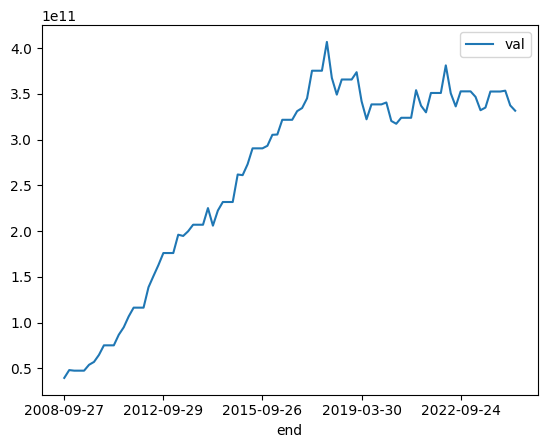

In [107]:

# get all filings data 
assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
assetsData.columns
assetsData.form

# get assets from 10Q forms and reset index
assets10Q = assetsData[assetsData.form == '10-Q']
assets10Q = assets10Q.reset_index(drop=True)

# plot 
assets10Q.plot(x='end', y='val')